In [1]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,12))
plt.rc('font', size=22)
plt.rc('text', usetex=True)
%load_ext itikz
import numpy as np
np.set_printoptions(precision=3, linewidth=120)
import ejercicio1 as ej1

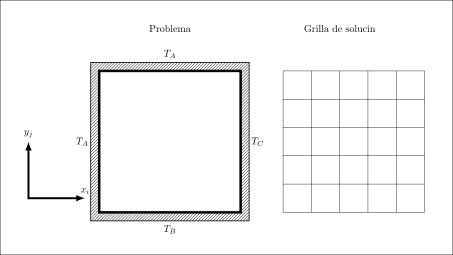

In [2]:
%%itikz
% requiere latex + itikz (https://github.com/jbn/itikz) + pdf2svg 
\documentclass[tikz]{standalone}
\usepackage{amsmath}
\usetikzlibrary{patterns,positioning}

\begin{document}

  \begin{tikzpicture}
    \draw [fill=white] (-6, -4) rectangle (10,5);
    \node at (0, 4) {Problema};
    \node at (6,4) {Grilla de solución};
     \draw [draw,thick,pattern=north east lines] (-2.8,-2.8) rectangle (2.8,2.8);
    \draw [draw,line width=2.5pt,anchor=base,fill=white] (-2.5,-2.5) rectangle (2.5,2.5);
    \draw [<->, >=latex, line width = 2pt ]
    (-5,0) node [anchor=south] { $y_j$ }  -- (-5,-2) -- (-3,-2) node [anchor=south] {$x_i$};
    \node at (-3.1,0) {$T_A$};
    \node at (0,-3.1) {$T_B$};
    \node at (3.1,0)  {$T_C$};
    \node at (0,3.1)  {$T_A$};
    
    \draw[step=1cm, yshift=0.5cm] (4, -3) grid (9, 2);
  \end{tikzpicture}

\end{document}


# Ejercicio 1


In [3]:
Nx = Ny = 10
valcc = {'a': 75, 'b': 0, 'c': 50, 'd':100}
tycc = {'a': 'temp', 'b': 'flujo', 'c': 'temp', 'd': 'temp'}

In [4]:
chapa = ej1.Chapa(Nx,Ny, tycc, valcc)
#chapa.get_borders_indexes()
chapa.makeborders()
chapa.makevertices()
chapa.makematrix()

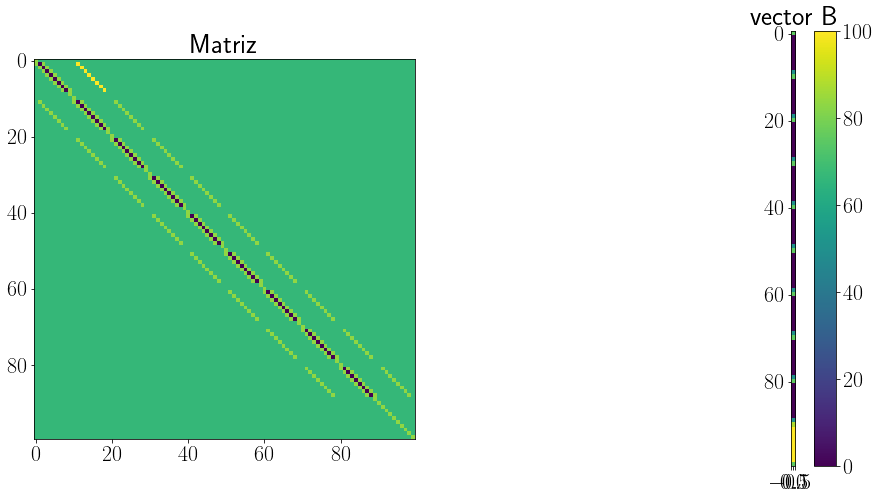

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0].imshow(chapa.M)
ax[0].set_title('Matriz')
mapable = ax[1].imshow(chapa.B) 
ax[1].set_title('vector B')
plt.colorbar(mapable)

In [6]:
T = chapa.msolve()
Tplot = chapa.T.reshape(chapa.Nx, chapa.Ny)
x, y = np.meshgrid(np.linspace(0,1,chapa.Nx), np.linspace(0,1,chapa.Ny))

In [7]:
Tplot.shape

(10, 10)

In [9]:
dTx =np.array([Tplot[:,i+1]-Tplot[:,i] for i in range(Tplot.shape[1]-1)])
dTx = np.vstack((dTx, Tplot[:,-1]-Tplot[:,-2])).transpose()  

In [10]:
dTy =np.array([Tplot[i+1,:]-Tplot[i,:] for i in range(Tplot.shape[0]-1)])
dTy = np.vstack((dTy, Tplot[-1,:]-Tplot[-2,:]) )   

(0.0, 1.0)

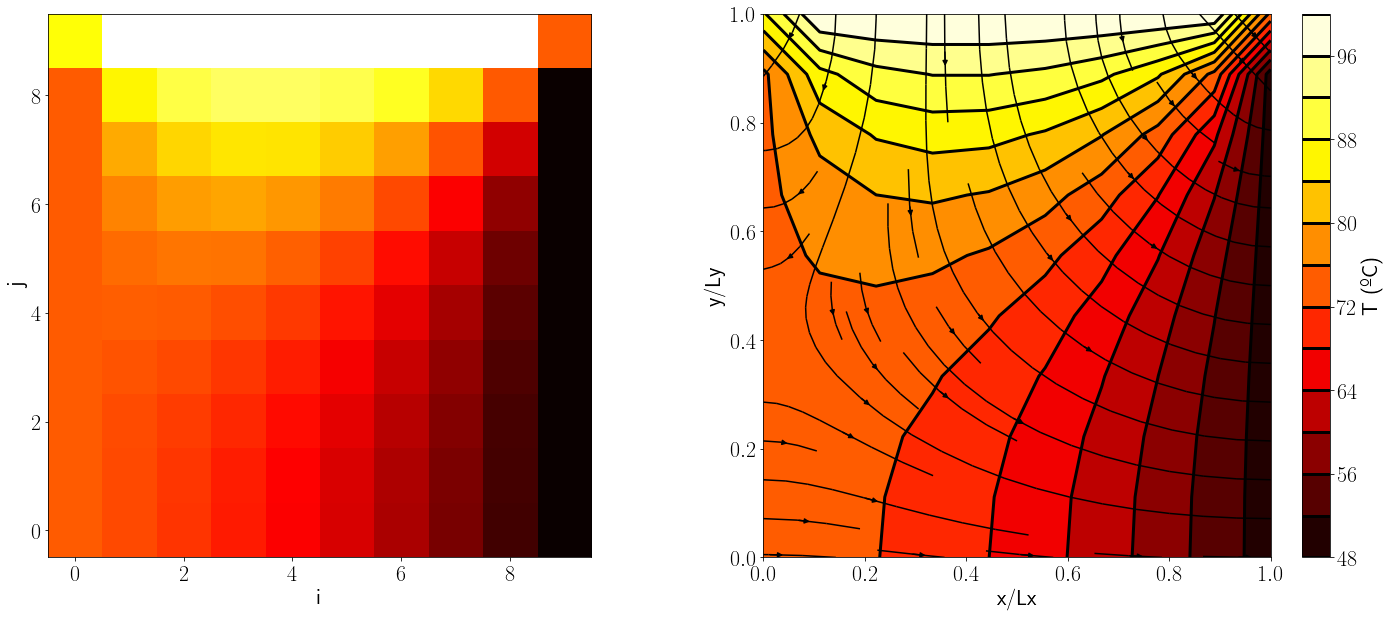

In [11]:
fig, ax = plt.subplots(1,2, figsize=(25,10))
ax[0].imshow(Tplot, origin ='lower', cmap='hot')
mapable = ax[1].contourf(x,y,Tplot, 'k', levels=12, cmap='hot')
lines = ax[1].contour(x,y,Tplot, 'k', levels=12, colors='black', linewidths=3)
plt.streamplot(x,y, -dTx, -dTy, color='k', density=0.5)
cbar = plt.colorbar(mapable)
cbar.add_lines(lines)
cbar.set_label('T (ºC)')
ax[0].set_xlabel('i')
ax[0].set_ylabel('j')
ax[1].set_xlabel('x/Lx')
ax[1].set_ylabel('y/Ly')
ax[1].set_ylim(0,1)

# Escaleo

In [12]:
N,  dt = ej1.escaleo(maxn=150)

  0%|          | 0/10 [00:00<?, ?it/s]

In [14]:
modeltag =rf'$\delta t = N^p_x$' 

In [15]:
p = np.polyfit(np.log10(N),np.log10(dt), 1)
model = np.poly1d(p)
modeldt = model(np.log10(N))

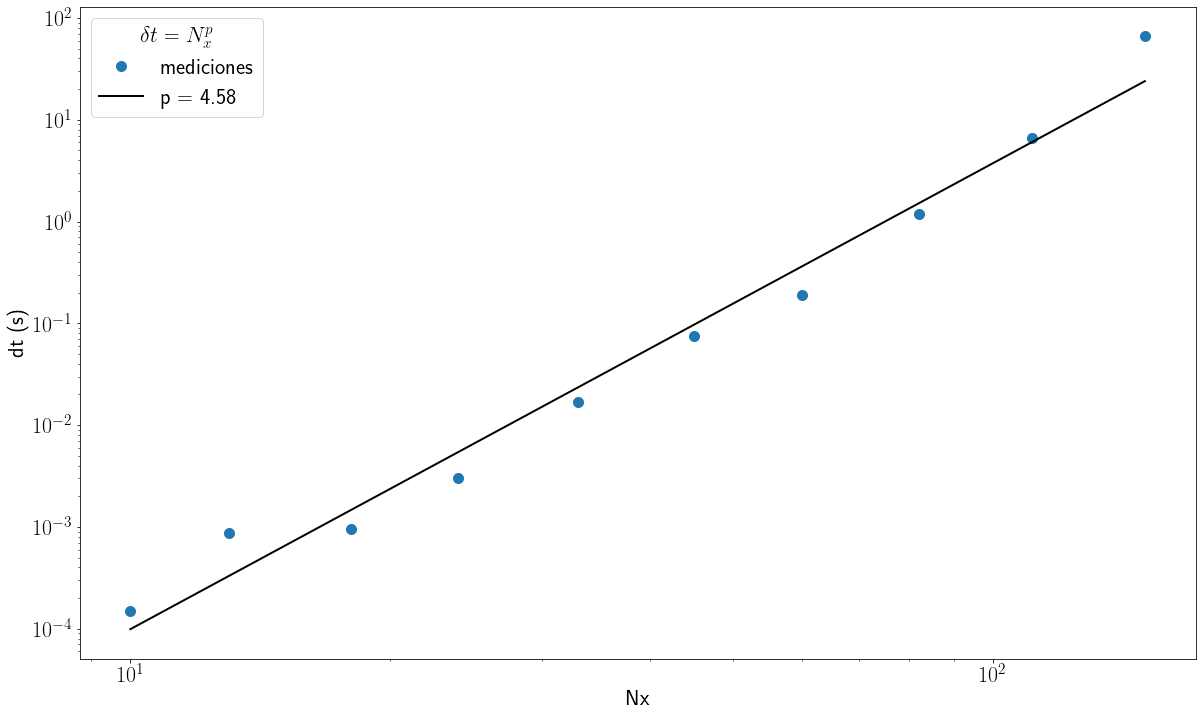

In [16]:
plt.loglog(N,dt,'o', markersize=10, label='mediciones')
plt.loglog(N,10**(modeldt),'k', linewidth=2, label=f'p = {p[0]:3.2f}')
plt.xlabel('Nx')
plt.ylabel('dt (s)')
plt.legend(title=modeltag)
